In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle
import matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import ops_plotall, ops_plotsubset, ops_plot_acp_inits, ops_plot_timing_inits, ops_plot_timing_inits_L2, get_prc, plot_pcr
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.1
wc.params.dt = dt

duration = 500.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration
x_init = 0.25426803074613735
y_init = 0.2588983729056897
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 2.6
wc.params["inh_ext"] = zero_input + 1.2

wc.run()
peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
p_list = []
for i in range(3,len(peaks)):
    p_list.append(peaks[i]- peaks[i-1])
period = np.mean(p_list)*dt

savepath = ('..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                'paper2_chaos' + os.sep + 'exploration' + os.sep + 'images_ops' + os.sep + 'sc2' + os.sep + '2-6_1-2' + os.sep )

savepath_subset = ( '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                        'paper2_chaos' + os.sep + 'opt_phase_shift' + os.sep + 'images' + os.sep + 'sc2' + os.sep + '2-6_1-2' + os.sep )

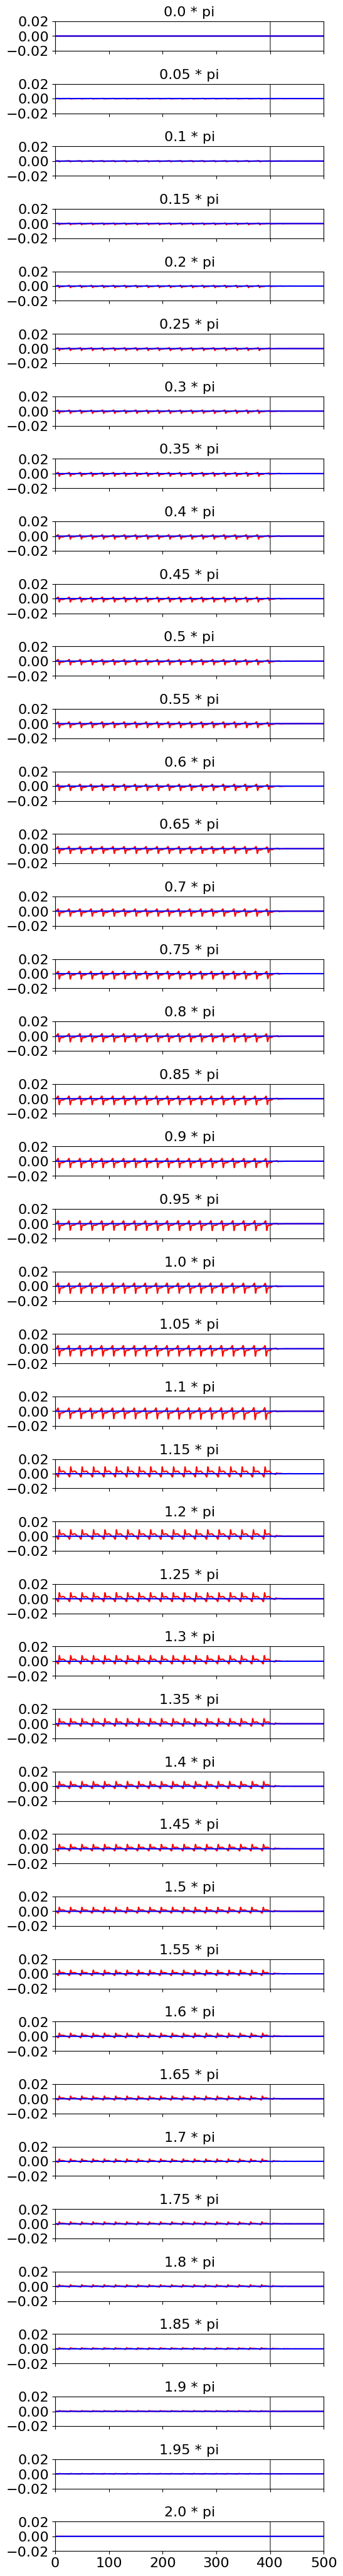

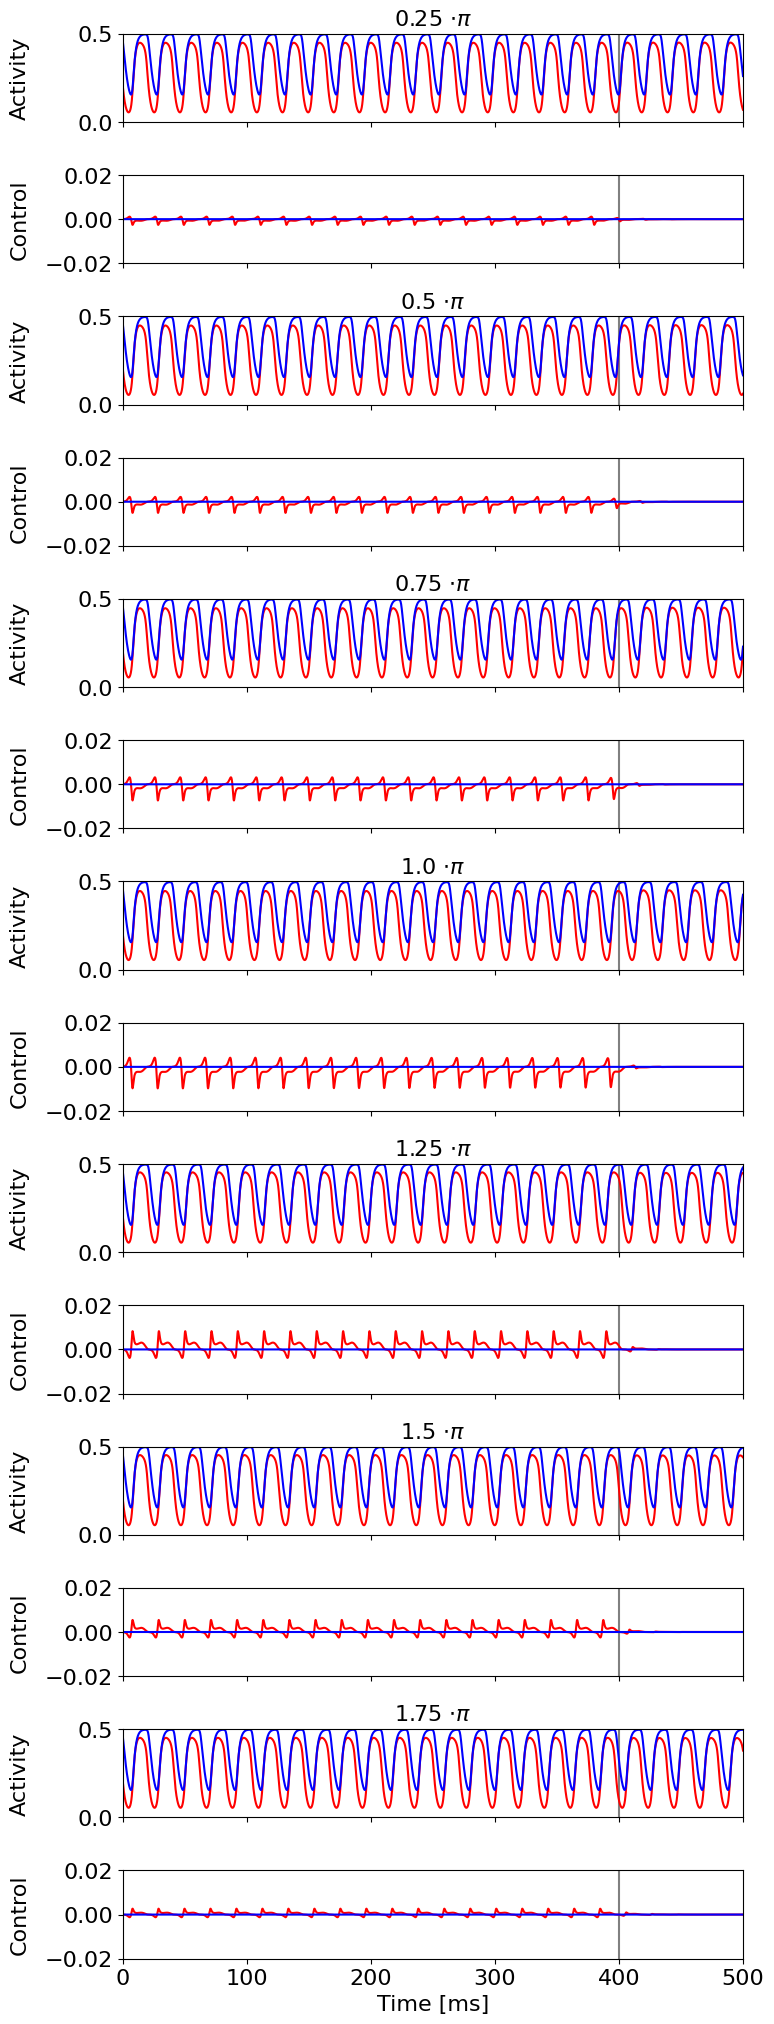

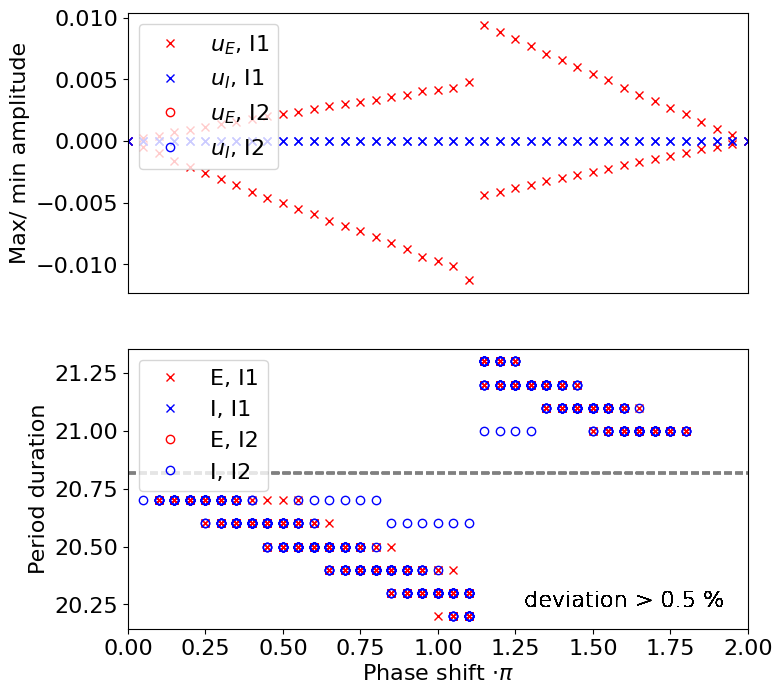

In [3]:
duration = 500.
dt=0.1

filehandler = open("results_min_w1.pickle","rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

#filehandler = open("results_peak_w1.pickle","rb")
#results_peak_w1 = pickle.load(filehandler)
#filehandler.close()

for i_w in range(len(results_min_w1["w1"])):
    if i_w != 1:
        continue
    ops_plotall(results_min_w1["control"][i_w], 0.02, duration, dt, 400., results_min_w1["filename"][i_w], savepath)
    ops_plotsubset(results_min_w1["state"][i_w], results_min_w1["control"][i_w], 0.5, 0.02, duration, dt, 400., 
                results_min_w1["filename"][i_w], savepath_subset)
    #ops_plotall(results_peak_w1["control"][i_w], 0.25, duration, dt, 400., results_peak_w1["filename"][i_w], savepath)

ops_plot_acp_inits(results_min_w1, None, period, 0.005, dt, "plot1", savepath)
ops_plot_timing_inits(results_min_w1, None, dt, [0,450], 200., "plot2", savepath)

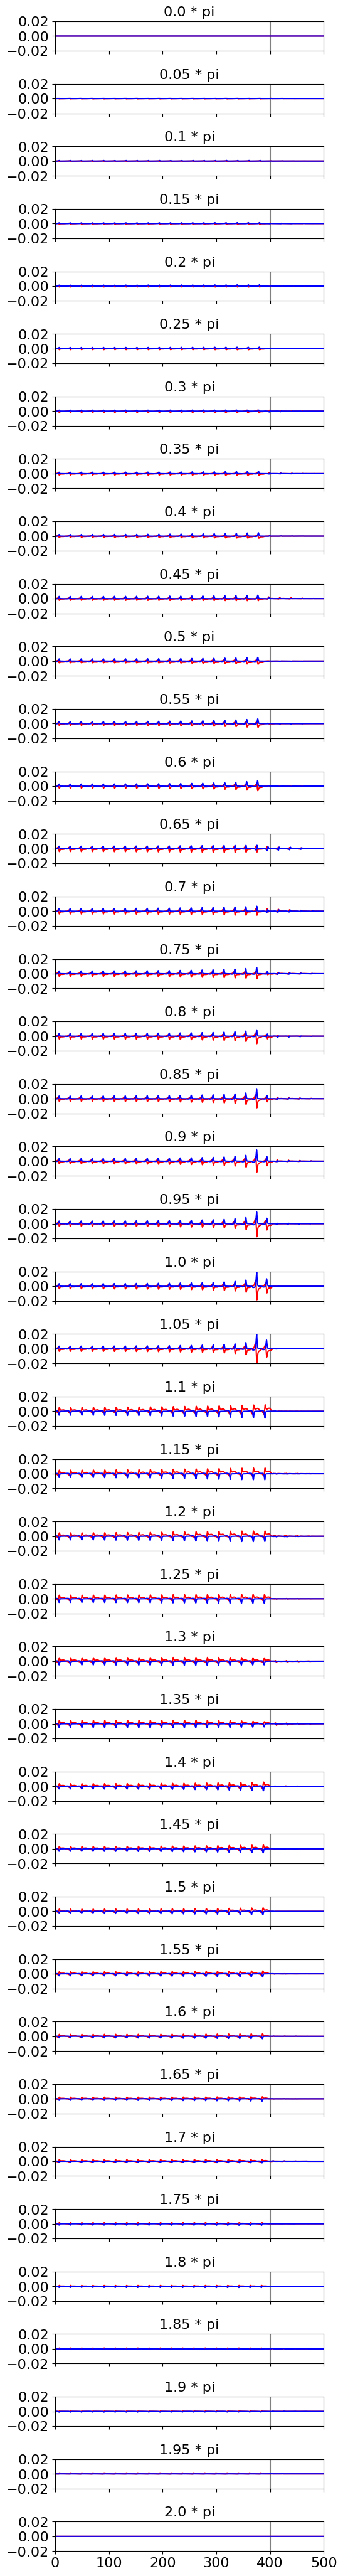

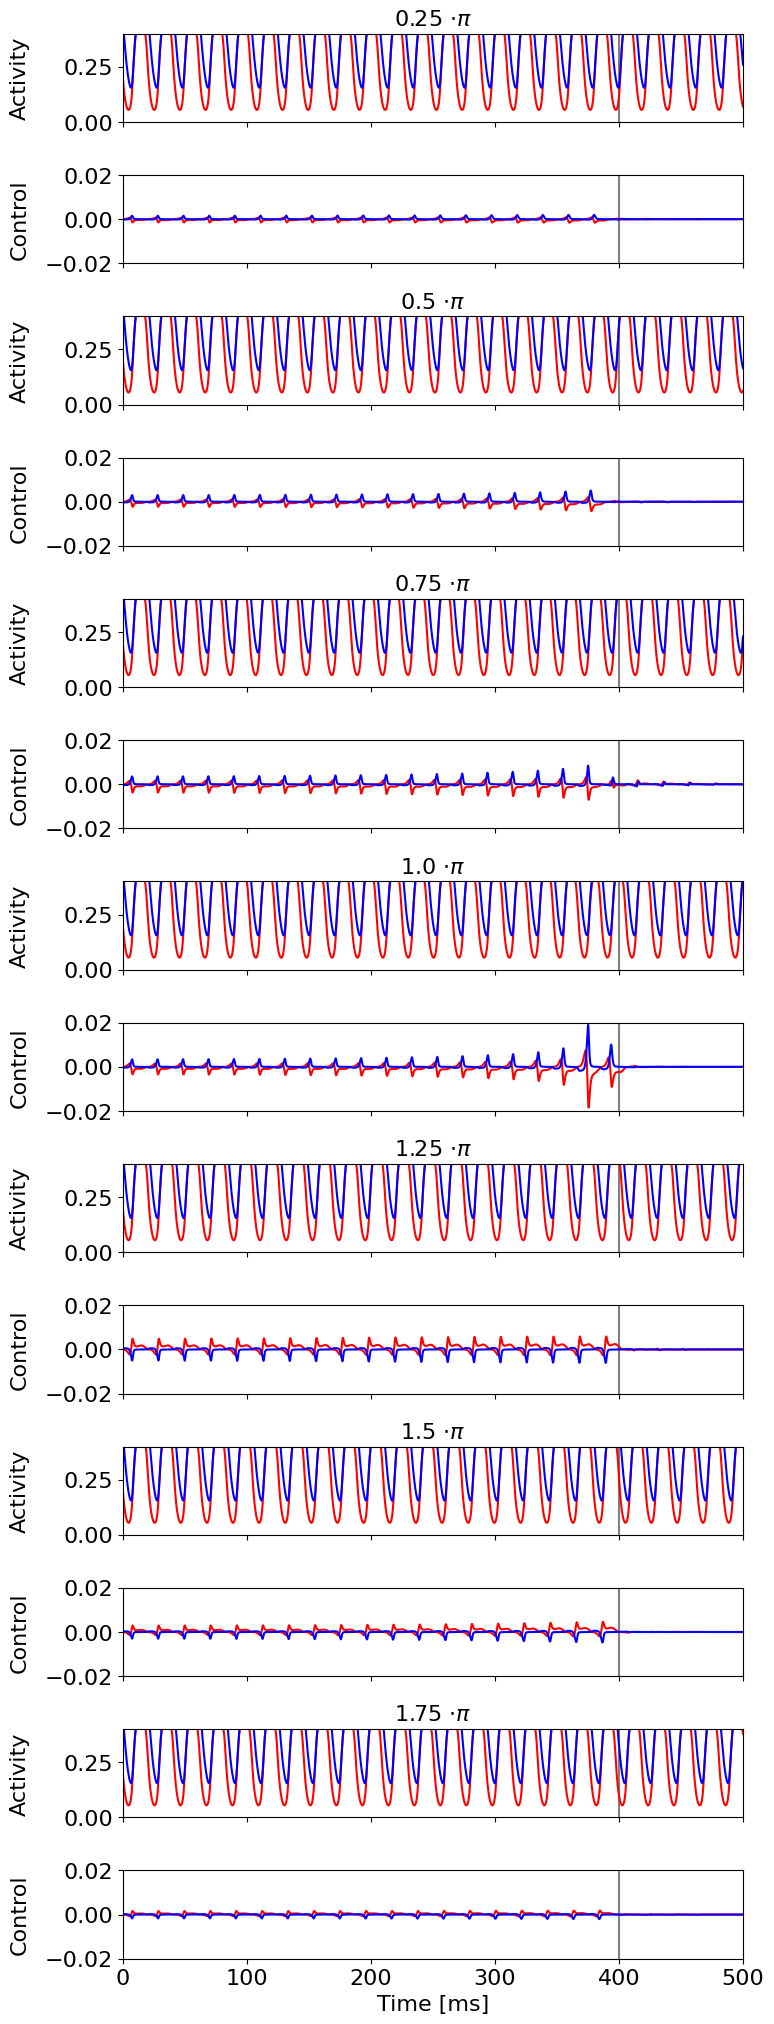

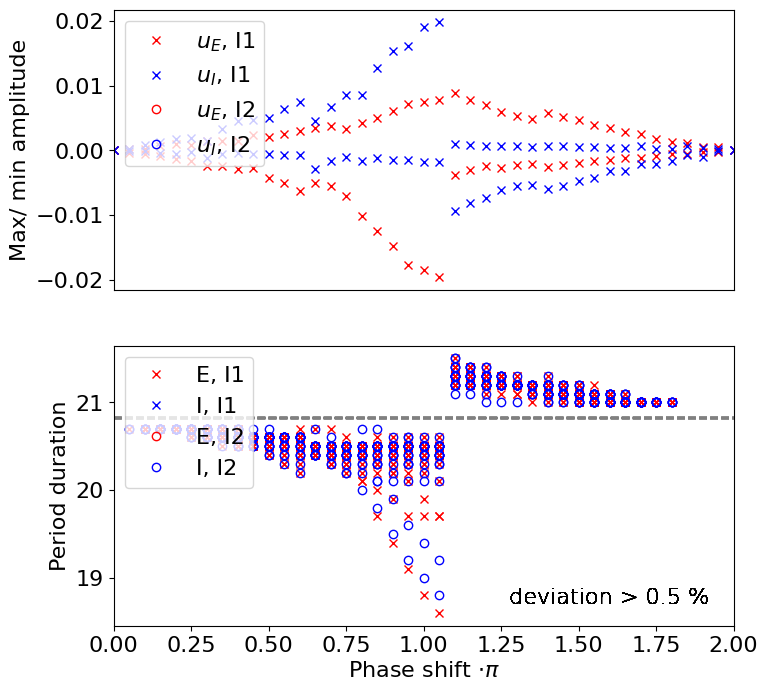

In [4]:
duration = 500.
dt=0.1

filehandler = open("results_min_w2.pickle","rb")
results_min_w2 = pickle.load(filehandler)
filehandler.close()

#filehandler = open("results_peak_w2.pickle","rb")
#results_peak_w2 = pickle.load(filehandler)
#filehandler.close()

for i_w in range(len(results_min_w2["w2"])):
    if i_w != 1:
        continue
    ops_plotall(results_min_w2["control"][i_w], 0.02, duration, dt, 400., results_min_w2["filename"][i_w], savepath)
    ops_plotsubset(results_min_w2["state"][i_w], results_min_w2["control"][i_w], 0.4, 0.02, duration, dt, 400., 
                results_min_w2["filename"][i_w], savepath_subset)
    #ops_plotall(results_peak_w2["control"][i_w], 0.25, duration, dt, 400., results_peak_w2["filename"][i_w], savepath)

ops_plot_acp_inits(results_min_w2, None, period, 0.005, dt, "plot1_w2", savepath)
ops_plot_timing_inits_L2(results_min_w2, None, dt, [0,450], 200., "plot2_w2", savepath)